In [13]:
# use synergyplaytypes.py to get data for a team and season
from nba_api.stats.endpoints import synergyplaytypes
import pandas as pd
from tabulate import tabulate
from datetime import date

# set the sort and season
sort_by = 'PPP'
season = '2022-23'

# set the play types to loop through
play_types = ['Isolation', 'Transition', 'PRBallHandler', 'PRRollman', 'Postup', 'Spotup', 'Handoff', 'Cut', 'OffScreen', 'OffRebound']

# loop through the play types
for play_type in play_types:
    synergy_play_types = synergyplaytypes.SynergyPlayTypes(
        league_id='00',
        per_mode_simple='PerGame',
        player_or_team_abbreviation='T',
        season_type_all_star='Regular Season',
        season=season,
        play_type_nullable=play_type,
        type_grouping_nullable='offensive',
        timeout=60,
        get_request=True
    )

    # get the results in a pandas DataFrame
    df = synergy_play_types.synergy_play_type.get_data_frame()

    # drop the unnecessary columns from the DataFrame
    df = df.drop(['SEASON_ID', 'TEAM_ABBREVIATION', 'TEAM_ID', 'GP', 'PERCENTILE'], axis=1)

    # sort by PPP
    df = df.sort_values(by=[sort_by], ascending=False)

    # print the DataFrame using tabulate
    print(f"Play Type: {play_type}")
    print(tabulate(df, headers='keys', tablefmt='psql'))

    # save the results to a csv file with date appended
    today = date.today()
    filename = f'stats/synergy_team/synergy_team_{play_type}_{str(today)}.csv'
    df.to_csv(filename, index=False)

    

Play Type: Isolation
+----+------------------------+-------------+-----------------+------------+-------+----------+---------------+----------------+---------------+--------------------+------------------+-----------+--------+-------+-------+-------+--------+
|    | TEAM_NAME              | PLAY_TYPE   | TYPE_GROUPING   |   POSS_PCT |   PPP |   FG_PCT |   FT_POSS_PCT |   TOV_POSS_PCT |   SF_POSS_PCT |   PLUSONE_POSS_PCT |   SCORE_POSS_PCT |   EFG_PCT |   POSS |   PTS |   FGM |   FGA |   FGMX |
|----+------------------------+-------------+-----------------+------------+-------+----------+---------------+----------------+---------------+--------------------+------------------+-----------+--------+-------+-------+-------+--------|
| 10 | Chicago Bulls          | Isolation   | Offensive       |      0.064 | 1.079 |    0.476 |         0.191 |          0.077 |         0.187 |              0.054 |            0.509 |     0.507 |    7   |   7.5 |   2.6 |   5.5 |    2.9 |
|  2 | Brooklyn Nets   

In [ ]:
import os
import pandas as pd

# set the directory containing the CSV files
directory = 'stats/synergy_team'

# get a list of all CSV files in the directory
csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

# create an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# loop through each CSV file and append its data to the combined DataFrame
for file in csv_files:
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path)
    combined_df = combined_df.append(df)

# save the combined data to a new CSV file
combined_df.to_csv('stats/synergy_team/combined.csv', index=False)

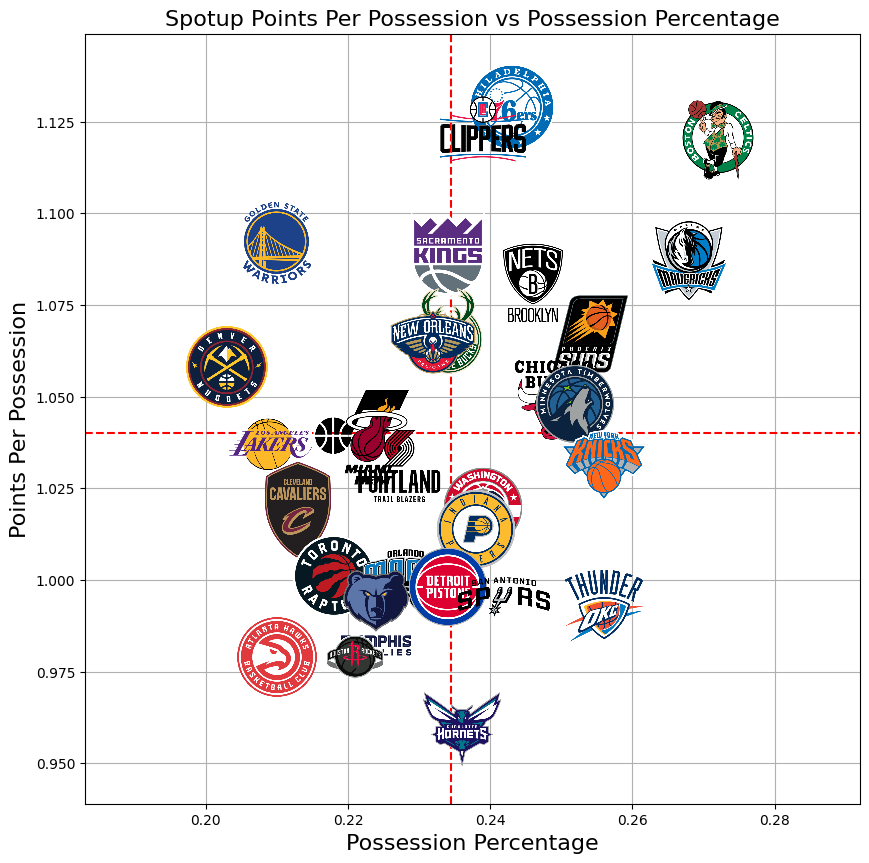

In [154]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

csv_filepath = 'stats/synergy_team/synergy_team_Spotup_2023-07-12.csv'
play_type = 'Spotup'
play_type_name = 'Spotup'
xaxis = 'POSS_PCT'
yaxis = 'PPP'
xaxis_name = 'Possession Percentage'
yaxis_name = 'Points Per Possession'

#read the data
df = pd.read_csv(csv_filepath)

# create a square chart with possession percentage on the x axis and ppp on the y axis
fig, ax = plt.subplots(figsize=(10, 10))

# loop through each row in the dataframe
for index, row in df.iterrows():
    # get the team name and logo path
    team_name = row['TEAM_NAME']
    logo_path = f'img/logos/{team_name}.png'
    
    # check if the logo file exists
    if os.path.isfile(logo_path):
        # load the logo image
        logo = plt.imread(logo_path)
        
        # create an OffsetImage object with the logo image
        imagebox = OffsetImage(logo, zoom=0.15)
        
        # create an AnnotationBbox object with the OffsetImage object
        ab = AnnotationBbox(imagebox, (row[xaxis], row[yaxis]), frameon=False)
        
        # add the AnnotationBbox object to the plot
        ax.add_artist(ab)
    else:
        # if the logo file does not exist, plot a text label instead
        ax.annotate(team_name, (row[xaxis], row[yaxis]), fontsize=12, ha='center')
    #float the Charlotte Hornets logo to the top and make it bigger
    if team_name == 'Charlotte Hornets':
        ab.set_zorder(100)



# add labels to the axes
plt.xlabel(xaxis_name, fontsize=16)
plt.ylabel(yaxis_name, fontsize=16)

# draw a horizontal line at the league average for PPP
plt.axhline(y=df[yaxis].mean(), color='red', linestyle='--')

# draw a vertical line at the league average for possession percentage
plt.axvline(x=df[xaxis].mean(), color='red', linestyle='--')

# add a title that combines play_type, yaxis and xaxis variable
plt.title(f'{play_type_name} {yaxis_name} vs {xaxis_name}', fontsize=16)

# add gridlines
plt.grid(True)

# limit the axis to only show data within the range of the data
plt.xlim(df[xaxis].min() - 0.02, df[xaxis].max() + 0.02)
plt.ylim(df[yaxis].min() - 0.02, df[yaxis].max() + 0.02)

# show the plot
plt.show()

#save the plot to a file with name csv_filepath minus .csv plus .png
fig.savefig(csv_filepath[:-4] + "_" + xaxis + "_" + yaxis + '_' + '.png', dpi=300)